---
title: Feature Selection
toc: true
---

Feature selection is a crucial step in the machine learning pipeline. It involves selecting a subset of relevant features (variables, predictors) for use in model construction. The main goals of feature selection are to improve model performance, reduce overfitting, and decrease training time.

<center><img src="https://www.sc-best-practices.org/_images/feature_selection.jpeg" style="filter:invert(1)" width="100%"></center>


<!-- ## Covariance

Covariance is a measure of the relationship between two random variables. Intiuitively, it indicates how much the two variables change together. That is, if one variable tends to increase when the other increases, the covariance is positive; if one variable tends to decrease when the other increases, the covariance is negative.

$$ \text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{n} $$

where $x_i$ and $y_i$ are the $i$-th values of the two variables, $ \mu_x$ and $ \mu_y$ are the means of the two variables, and $n$ is the number of values.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/Covar.png" alt="Covariance" style="filter:invert(1)" width="90%"></center>

The covariance can be positive, negative, or zero. A positive covariance indicates that the two variables tend to increase or decrease together, while a negative covariance indicates that one variable tends to increase as the other decreases.

Covariance is used in feature selection to identify features that are correlated with the target variable. Features with high covariance with the target variable are likely to be more informative and useful for prediction.

Covariance however, has some limitations:

- **Scale Dependence**: Covariance is affected by the scale of the variables. This means that if the units of measurement change, the covariance value will also change, making it difficult to compare covariances across different datasets or features.

- **Interpretability**: The magnitude of covariance is not easily interpretable. A high covariance value does not necessarily imply a strong relationship between the variables, as it depends on the scales of the variables involved.

- **Non-linearity**: Covariance only captures linear relationships between variables. It may not effectively identify non-linear relationships, which can be important in many real-world scenarios.

To address these limitations, correlation coefficients such as Pearson's correlation coefficient are often used in feature selection, as they provide a standardized measure of the strength and direction of the linear relationship between variables. -->

## Curse of Dimensionality

The "curse of dimensionality" refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces that do not occur in low-dimensional settings. 


As the number of features (dimensions) increases, the volume of the space increases exponentially, leading to several challenges:

1. **Data Sparsity**: In high-dimensional spaces, data points become sparse. This sparsity makes it difficult to find meaningful patterns or relationships in the data, as the distance between points increases.

    In other words, as the number of features increases, the amount of data needed to generalize accurately grows exponentially. This is because the volume of the search space increases exponentially with each new dimension added. To maintain the same level of data density, the number of required data points must also increase exponentially.

<center><img src="https://www.i2tutorials.com/wp-content/media/2019/09/Curse-of-Dimensionality-i2tutorials.png" style="filter:invert(1)" width="70%"></center>


2. **Increased Computational Cost**: The computational cost of algorithms increases with the number of dimensions. Many machine learning algorithms become inefficient or infeasible to run as the dimensionality increases.

3. **Overfitting**: With more features, models can become overly complex and fit the noise in the training data rather than the underlying patterns. This leads to poor generalization to new data.

4. **Distance Metrics Become Less Meaningful**: In high-dimensional spaces, the concept of distance becomes less meaningful. For example, the difference between the nearest and farthest neighbor distances tends to diminish, making it harder to distinguish between points.

As a general rule of thumb, having at least 5 to 10 times as many observations as features is recommended to ensure reliable model performance. i.e. 

$$ n \geq 5 \times d $$

where $n$ is the number of observations and $d$ is the number of features.

This isn’t a strict mathematical law. It’s a practical heuristic that helps ensure models can generalize well rather than memorize noise.

To mitigate the curse of dimensionality, feature selection techniques are employed to reduce the number of features while retaining the most informative ones. This helps improve model performance, reduce overfitting, and decrease computational costs.

<center><img src="https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2022_05_curse-of-dimensionality.jpg" style="filter:invert(1)" width="70%">
</center>

This is why feature selection is essential in high-dimensional datasets to ensure that models can learn effectively without being overwhelmed by irrelevant or redundant information.


## Correlations 

Correlations are statistical measures that describe the strength and direction of the relationship between two variables. They help to identify how changes in one variable are associated with changes in another variable.

* Positive correlation: If one variable increases, the other variable also increases.

* Negative correlation: If one variable increases, the other variable decreases.

* Zero correlation: There is no relationship between the two variables.

The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation.

There are several methods to compute the correlation between two variables. The two most common methods are the Pearson correlation coefficient and the Spearman correlation

### Pearson Correlation Coefficient

The Pearson correlation coefficient measures the linear relationship between two variables. It ranges from -1 to 1.

$$ r = \frac{\sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_{i=1}^{n} (x_i -  \mu_x)^2} \sqrt{\sum_{i=1}^{n} (y_i -  \mu_y)^2}} $$

where $x_i$ and $y_i$ are the $i$-th values of the two variables, $ \mu_x$ and $ \mu_y$ are the means of the two variables, and $n$ is the number of values.

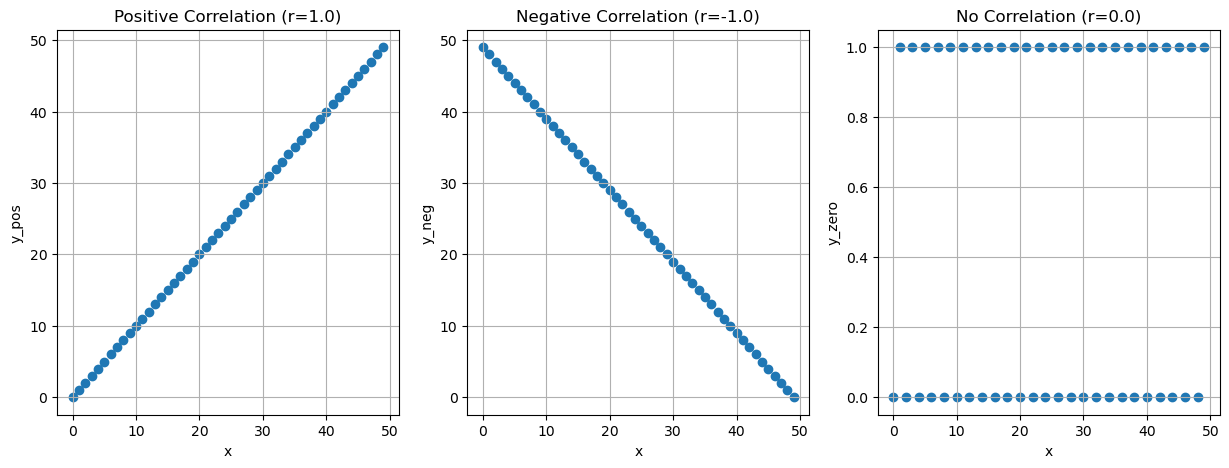

In [13]:
import pandas as pd
from matplotlib import pyplot as plt 

n = 50

df = pd.DataFrame()

df['x'] = list(range(n))
df['y_pos'] = df['x']
df['y_neg'] = df['x'].values[::-1]
df['y_zero'] = [0  if (i % 2 == 0) else 1 for i in range(n)]

r_pos = df['x'].corr(df['y_pos'])
r_neg = df['x'].corr(df['y_neg'])
r_zero = df['x'].corr(df['y_zero'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(df['x'], df['y_pos'])
ax[0].set_title(f'Positive Correlation (r={r_pos:.1f})')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y_pos')
ax[0].grid(True)

ax[1].scatter(df['x'], df['y_neg'])
ax[1].set_title(f'Negative Correlation (r={r_neg:.1f})')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y_neg')
ax[1].grid(True)

ax[2].scatter(df['x'], df['y_zero'])
ax[2].set_title(f'No Correlation (r={r_zero:.1f})')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y_zero')
ax[2].grid(True)


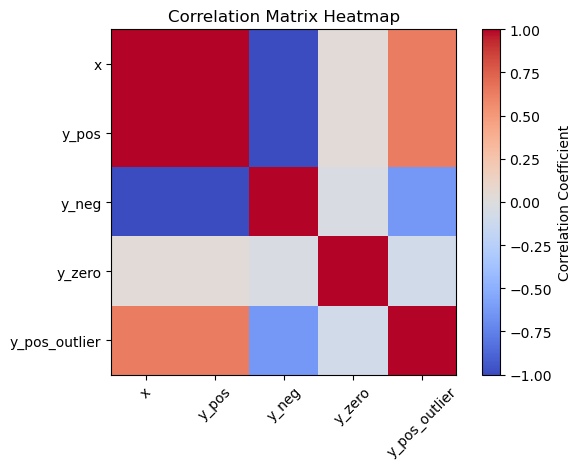

In [20]:
corrs = df.corr()

plt.imshow(corrs, cmap='coolwarm', vmin=-1, vmax=1)

plt.colorbar(label='Correlation Coefficient')

plt.xticks(range(len(corrs)), corrs.columns, rotation=45)
plt.yticks(range(len(corrs)), corrs.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Pearson correlation is extremely sensitive to outliers and assumes that the relationship between the variables is linear.

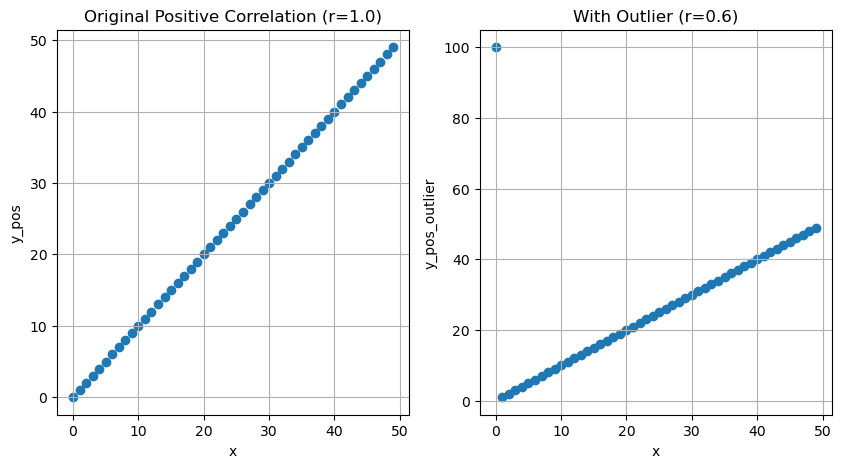

In [18]:
df['y_pos_outlier'] = df['y_pos'].copy()

df['y_pos_outlier'].iloc[0] = 100  # Introduce an outlier

r_pos_outlier = df['x'].corr(df['y_pos_outlier'])

fig2, ax2 = plt.subplots(1, 2, figsize=(10, 5))

ax2[0].scatter(df['x'], df['y_pos'])

ax2[0].set_title(f'Original Positive Correlation (r={r_pos:.1f})')
ax2[0].set_xlabel('x')
ax2[0].set_ylabel('y_pos')
ax2[0].grid(True)

ax2[1].scatter(df['x'], df['y_pos_outlier'])
ax2[1].set_title(f'With Outlier (r={r_pos_outlier:.1f})')
ax2[1].set_xlabel('x')
ax2[1].set_ylabel('y_pos_outlier')
ax2[1].grid(True)

plt.show()

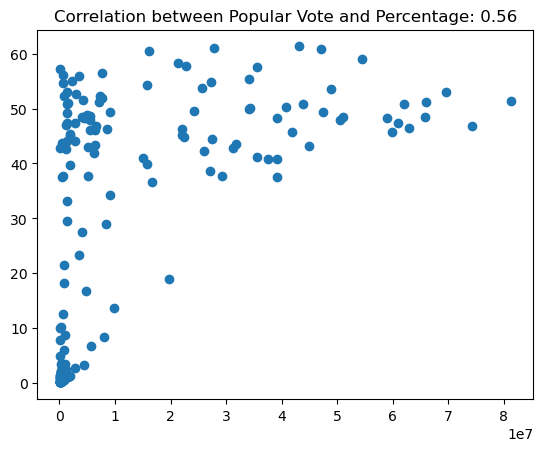

In [4]:


url = "https://raw.githubusercontent.com/fahadsultan/csc272/main/data/elections.csv"

elections = pd.read_csv(url)

elections.head()

x = elections['Popular vote']
y = elections['%']

r = x.corr(y, method='pearson')

plt.scatter(x, y)
plt.title(f'Correlation between Popular Vote and Percentage: {r:.2f}');

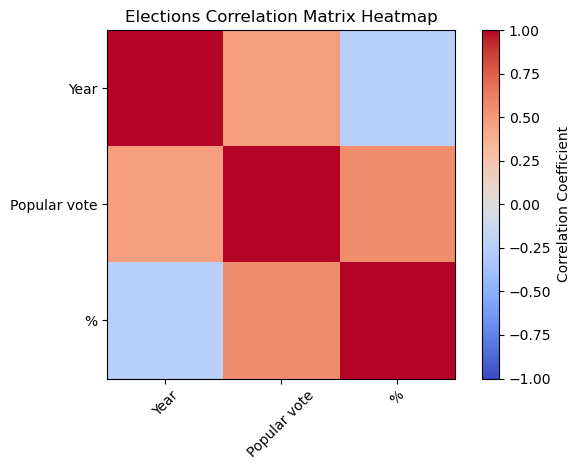

In [21]:
corrs = elections.corr()

plt.imshow(corrs, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corrs)), corrs.columns, rotation=45)
plt.yticks(range(len(corrs)), corrs.columns)

plt.title('Elections Correlation Matrix Heatmap')

plt.tight_layout()

You can also compute the correlation between two columns of a `DataFrame` using the `.corr()` method.

### Spearman Correlation

The Spearman correlation coefficient measures the monotonic relationship between two variables. In simpler terms, it assesses how well the relationship between two variables can be described constantly increasing or decreasing, regardless of whether that relationship is linear.

Another way to think about it is that the Spearman correlation evaluates the relationship between the ranks of the data rather than the raw data itself. It creates a ranking of the values for each variable and then computes the Pearson correlation coefficient on these ranks.

Similar to Pearson correlation, coefficient, it ranges from -1 to 1.




In [ ]:
x.corr(y, method='spearman')

0.7432486904455022

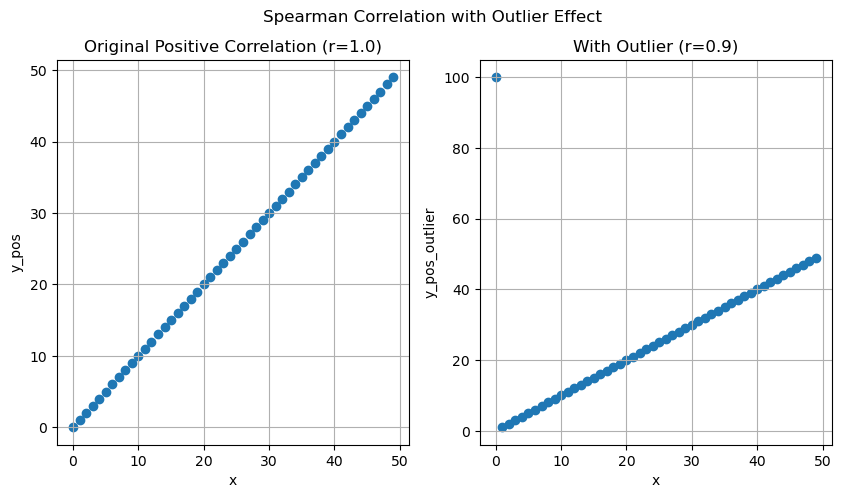

In [26]:
df['y_pos_outlier'] = df['y_pos'].copy()

df['y_pos_outlier'].iloc[0] = 100  # Introduce an outlier

r_pos_outlier = df['x'].corr(df['y_pos_outlier'], method='spearman')

fig2, ax2 = plt.subplots(1, 2, figsize=(10, 5))

ax2[0].scatter(df['x'], df['y_pos'])

ax2[0].set_title(f'Original Positive Correlation (r={r_pos:.1f})')
ax2[0].set_xlabel('x')
ax2[0].set_ylabel('y_pos')
ax2[0].grid(True)

ax2[1].scatter(df['x'], df['y_pos_outlier'])
ax2[1].set_title(f'With Outlier (r={r_pos_outlier:.1f})')
ax2[1].set_xlabel('x')
ax2[1].set_ylabel('y_pos_outlier')
ax2[1].grid(True)

fig2.suptitle('Spearman Correlation with Outlier Effect')

plt.show()

## Feature Selection using Correlations

Feature selection using correlations involves identifying and selecting features that have a strong correlation with the target variable while minimizing redundancy among the features themselves. Here are some common techniques for feature selection using correlations:

### 1. Correlation Matrix

A correlation matrix is a table that displays the correlation coefficients between multiple variables. It helps to visualize the relationships between features and the target variable.

Once you have the correlation matrix, you can identify features that have a high correlation with the target variable (e.g., above a certain threshold like 0.5 or 0.7) and select them for your model.

### 2. Removing Highly Correlated Features

Highly correlated features can introduce multicollinearity, which can negatively impact model performance. To address this, you can remove one of the features from pairs of highly correlated features (e.g., correlation coefficient above 0.8 or 0.9).

### 3. Using Correlation Thresholds

You can set a correlation threshold to filter out features that do not meet a certain level of correlation with the target variable. For example, you might choose to keep only features with a correlation coefficient above 0.3 or below -0.3.